# Savytski Report stage 4
## Imports

In [1]:


import torch
from torch.utils.data import DataLoader
from dataSets import ClassificationDataset, GenerationDataset
from models import GenerationGRU, GenerationLSTM, GenerationRNN
from models import ClassificationRNN, ClassificationGRU, ClassificationLSTM
from models import train, test, create_sentence
from matplotlib import pyplot as plt
from torch import nn



### Run functions


In [2]:
def run_generation(model_name: str, loss_fn, model_type="gen", lr=0.001, model_configuration=0, batch_size_train=64, batch_size_test=64, epochs=10, disable_msg=False, generation_msg=["fish", "walks", "into"]):
    
    if model_type == "gen":
        train_data = GenerationDataset()
        test_data = GenerationDataset(test=True)
    elif model_type == "class":
        train_data = ClassificationDataset()
        test_data = ClassificationDataset(test=True)
    else:
        print("Error, unknown model type")
        return
    
    if model_type == "gen":
        model_name = model_name.upper()
        if model_name == "RNN":
            model = GenerationRNN(len(train_data.int_to_vocab))
        elif model_name == "LSTM":
            model = GenerationLSTM(len(train_data.int_to_vocab))
        elif model_name == "GRU":
            model = GenerationGRU(len(train_data.int_to_vocab), configuration=model_configuration)
        else:
            print("Error, unknown model")
            return
    else:
        model_name = model_name.upper()
        if model_name == "RNN":
            model = ClassificationRNN(len(train_data.int_to_vocab))
        elif model_name == "LSTM":
            model = ClassificationLSTM(len(train_data.int_to_vocab))
        elif model_name == "GRU":
            model = ClassificationGRU(len(train_data.int_to_vocab))
        else:
            print("Error, unknown model")
            return
        
    
    if batch_size_train == "full":
        batch_size_train = len(train_data)
        train_data = DataLoader(train_data, batch_size = len(train_data))
    else:
        train_data = DataLoader(train_data, batch_size = batch_size_train, drop_last=True)
    
    if batch_size_test == "full":
        batch_size_test = len(test_data)
        test_data = DataLoader(test_data, batch_size=len(test_data))
    else:
        test_data = DataLoader(test_data, batch_size=batch_size_test, drop_last=True)
        
    model.to("cpu")
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    train_loss = []
    for i in range(epochs):
        h0 = model.init_state(batch_size_train)
        if not disable_msg:
            print(f"Epoch {i+1} ---------")
        
        if model_name == "LSTM":
            l = train(train_data, model, opt, loss_fn, h0, is_lstm=True) 
        else:
            l = train(train_data, model, opt, loss_fn, h0) 
        train_loss.append(l)
        if not disable_msg:
            print(f"Training loss: {train_loss[i]}")

    test(test_data, model, loss_fn, batch_size_test)
    test(train_data, model, loss_fn, batch_size_train, mode="Train")
    
    
    
    plt.plot(train_loss)
    plt.xlabel("Epochs")
    plt.ylabel("Loss (cross entropy)")
    plt.title(f"Loss convergence plot for {model_name}")
    plt.show()    
    if model_type == "gen":
        print(f"Geneated joke: {create_sentence(generation_msg, model, test_data)}")



# Base models, with one layer:
`Generation`:
1) `RNN`


        Metrics for model Generation RNN on Test data:
        -- Accuracy: 17.90 %
        -- Recall: 42.46 %
        -- Precision: 65.69 %
        -- F1: 51.58 %
        -- Loss: 21.66
        

        Metrics for model Generation RNN on Train data:
        -- Accuracy: 92.40 %
        -- Recall: 98.59 %
        -- Precision: 97.29 %
        -- F1: 97.94 %
        -- Loss: 0.21
        


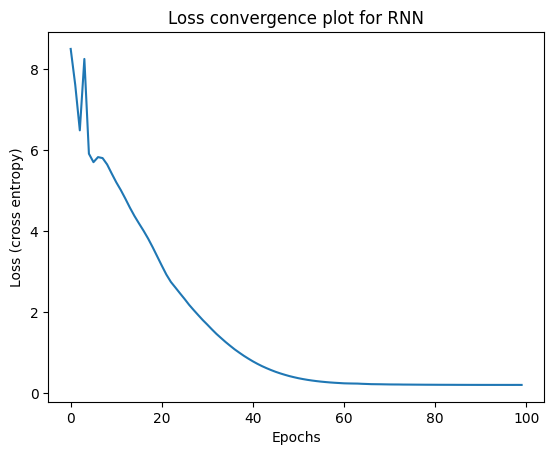

Geneated joke: fish walks into a bar and a table the bartender says what will you hold my hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand


In [3]:
run_generation("RNN", nn.CrossEntropyLoss(), lr=0.005, batch_size_train="full", batch_size_test="full", epochs=100, disable_msg=True)

2) `GRU`


        Metrics for model Generation GRU conf 0 on Test data:
        -- Accuracy: 19.19 %
        -- Recall: 46.10 %
        -- Precision: 61.67 %
        -- F1: 52.76 %
        -- Loss: 8.24
        

        Metrics for model Generation GRU conf 0 on Train data:
        -- Accuracy: 92.40 %
        -- Recall: 97.51 %
        -- Precision: 96.70 %
        -- F1: 97.10 %
        -- Loss: 0.25
        


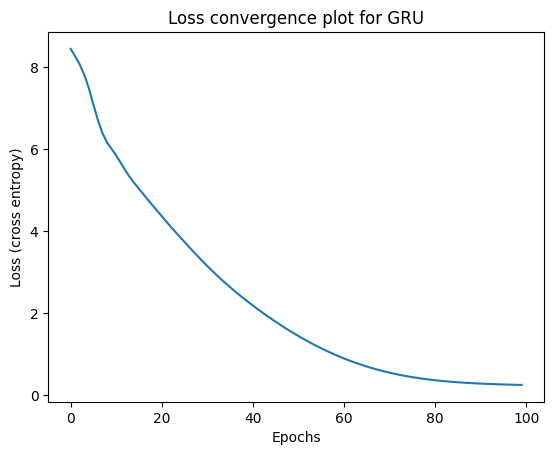

Geneated joke: fish walks into a bar and a table the bartender says what will you hold my hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand 

In [4]:

run_generation("GRU", nn.CrossEntropyLoss(), lr=0.002, batch_size_train="full", batch_size_test="full", epochs=100, disable_msg=True)

3) `LSTM`


        Metrics for model Generation LSTM on Test data:
        -- Accuracy: 18.21 %
        -- Recall: 42.02 %
        -- Precision: 61.04 %
        -- F1: 49.77 %
        -- Loss: 9.89
        

        Metrics for model Generation LSTM on Train data:
        -- Accuracy: 92.40 %
        -- Recall: 97.64 %
        -- Precision: 96.99 %
        -- F1: 97.31 %
        -- Loss: 0.20
        


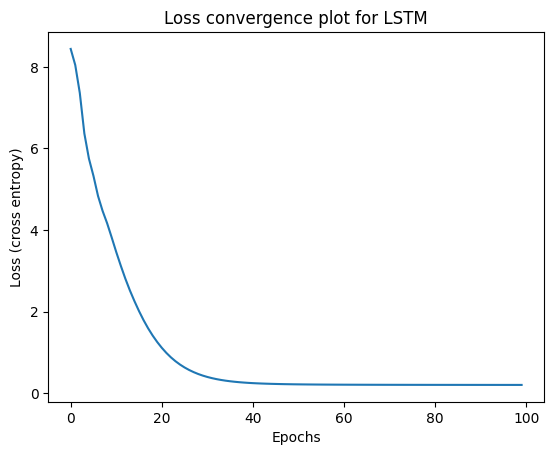

Geneated joke: fish walks into a bar and a table the bartender says what will you hold my hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand hand 

In [5]:

run_generation("LSTM", nn.CrossEntropyLoss(), lr=0.01, batch_size_train="full", batch_size_test="full", epochs=100, disable_msg=True)

`Classification`
1) `RNN`

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



        Metrics for model Classification RNN on Test data:
        -- Accuracy: 49.84 %
        -- Recall: 74.87 %
        -- Precision: 74.96 %
        -- F1: 74.92 %
        -- Loss: nan
        

        Metrics for model Classification RNN on Train data:
        -- Accuracy: 49.33 %
        -- Recall: 74.74 %
        -- Precision: 74.83 %
        -- F1: 74.79 %
        -- Loss: nan
        


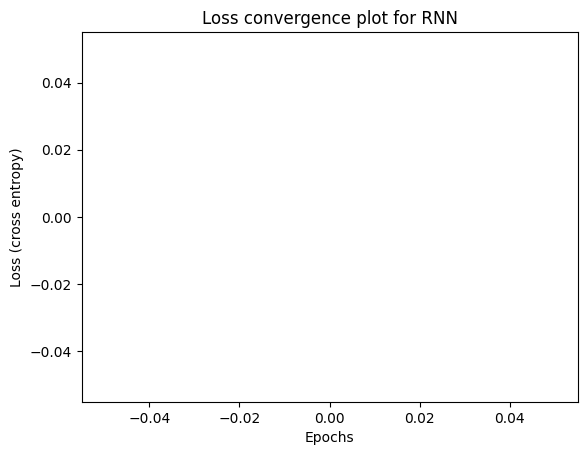

In [9]:

run_generation("RNN", nn.CrossEntropyLoss(), model_type="class", lr=0.001, batch_size_train=256, batch_size_test=128, epochs=100, disable_msg=True)

2) `GRU`

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch 1 ---------
Training loss: 1.2892181098738222
Epoch 2 ---------
Training loss: 1.0051057693577303
Epoch 3 ---------
Training loss: 0.9735815086085158
Epoch 4 ---------
Training loss: 0.9165548866557092
Epoch 5 ---------
Training loss: 0.742619002602764
Epoch 6 ---------
Training loss: 0.7159110203231733
Epoch 7 ---------
Training loss: 0.6949099658690777
Epoch 8 ---------
Training loss: 0.6937817906595997
Epoch 9 ---------
Training loss: 0.6748949320045943
Epoch 10 ---------
Training loss: 0.65865141460576
Epoch 11 ---------
Training loss: 0.6248977092123523
Epoch 12 ---------
Training loss: 0.5703441623559932
Epoch 13 ---------
Training loss: 0.48249438128520533
Epoch 14 ---------
Training loss: 0.37000976933031965
Epoch 15 ---------
Training loss: 0.271592772344953
Epoch 16 ---------
Training loss: 0.2014987331997488
Epoch 17 ---------
Training loss: 0.14020360399460055
Epoch 18 ---------
Training loss: 0.09676059784809339
Epoch 19 ---------
Training loss: 0.07751221977865573
E

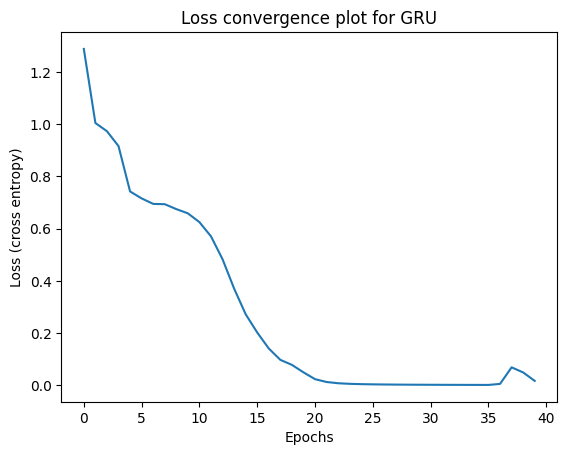

In [10]:

run_generation("GRU", nn.CrossEntropyLoss(), model_type="class", lr=0.001, batch_size_train=256, batch_size_test=128, epochs=40)

3) `LSTM`

Epoch 1 ---------
Training loss: 1.3313092674290634
Epoch 2 ---------
Training loss: 1.327978149841197
Epoch 3 ---------
Training loss: 3.9435766377327783
Epoch 4 ---------
Training loss: 1.7540518932561173
Epoch 5 ---------
Training loss: 1.1037797772315974
Epoch 6 ---------
Training loss: 0.9923004687754149
Epoch 7 ---------
Training loss: 0.7604052000439044
Epoch 8 ---------
Training loss: 0.660565345864935
Epoch 9 ---------
Training loss: 0.600975834831749
Epoch 10 ---------
Training loss: 0.5411983215317284
Epoch 11 ---------
Training loss: 0.48775715511484247
Epoch 12 ---------
Training loss: 0.43453750459803747
Epoch 13 ---------
Training loss: 0.3752840502360432
Epoch 14 ---------
Training loss: 0.34716712368517805
Epoch 15 ---------
Training loss: 0.3003006531405695
Epoch 16 ---------
Training loss: 0.2645770641639061
Epoch 17 ---------
Training loss: 0.22577686193063087
Epoch 18 ---------
Training loss: 0.19662330706709438
Epoch 19 ---------
Training loss: 0.17524523503079856

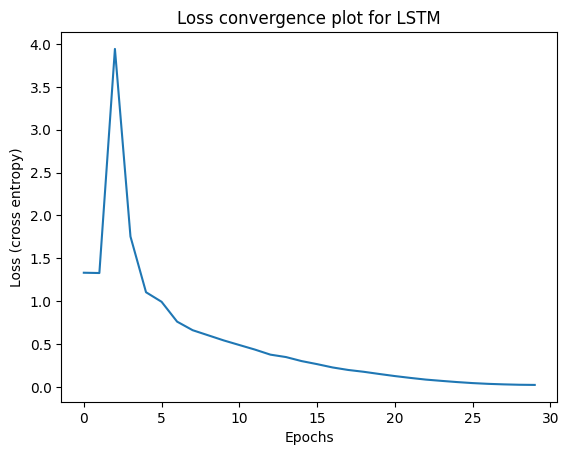

In [11]:
run_generation("LSTM", nn.CrossEntropyLoss(), model_type="class", lr=0.01, batch_size_train=256, batch_size_test=128, epochs=30)

## Ablation Studies

`LSTM` takes a long time to learn, therefore we will not touch these models. Moreover, the length of the chain due to the structure of torch library is limited to the shape of data. Hence we will focus on the `number of layers`, `dimensions of hidden layers`, `embedding layers`, along with `batch size` for the `GRU` and basic `RNN` models.

1) `GRU` with 2 layers


        Metrics for model Generation GRU conf 1 on Test data:
        -- Accuracy: 17.39 %
        -- Recall: 40.38 %
        -- Precision: 59.99 %
        -- F1: 48.27 %
        -- Loss: 10.12
        

        Metrics for model Generation GRU conf 1 on Train data:
        -- Accuracy: 92.38 %
        -- Recall: 97.27 %
        -- Precision: 97.23 %
        -- F1: 97.25 %
        -- Loss: 0.21
        


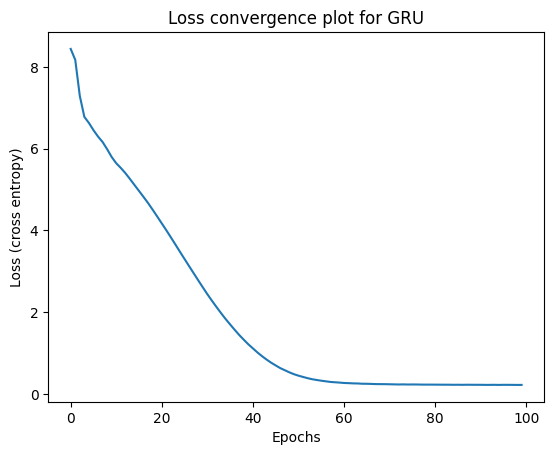

Geneated joke: fish walks into a bar and says ill have a burger for a week


In [4]:

run_generation("GRU", nn.CrossEntropyLoss(), lr=0.004, model_configuration=1, batch_size_train="full", batch_size_test="full", epochs=100, disable_msg=True)


Adding a second layer has resulted in a better created joke. Hence we are also interested in how the number changing embedding and hidden layer size would change the model

Epoch 1 ---------
Training loss: 8.443289756774902
Epoch 2 ---------
Training loss: 8.037993431091309
Epoch 3 ---------
Training loss: 7.117743015289307
Epoch 4 ---------
Training loss: 6.761409282684326
Epoch 5 ---------
Training loss: 6.643883228302002
Epoch 6 ---------
Training loss: 6.369193077087402
Epoch 7 ---------
Training loss: 6.141849994659424
Epoch 8 ---------
Training loss: 5.836475372314453
Epoch 9 ---------
Training loss: 5.6559271812438965
Epoch 10 ---------
Training loss: 5.429164409637451
Epoch 11 ---------
Training loss: 5.144361972808838
Epoch 12 ---------
Training loss: 4.888706207275391
Epoch 13 ---------
Training loss: 4.620250701904297
Epoch 14 ---------
Training loss: 4.342909812927246
Epoch 15 ---------
Training loss: 4.065561294555664
Epoch 16 ---------
Training loss: 3.7833597660064697
Epoch 17 ---------
Training loss: 3.512364149093628
Epoch 18 ---------
Training loss: 3.257866621017456
Epoch 19 ---------
Training loss: 3.0175952911376953
Epoch 20 ---------

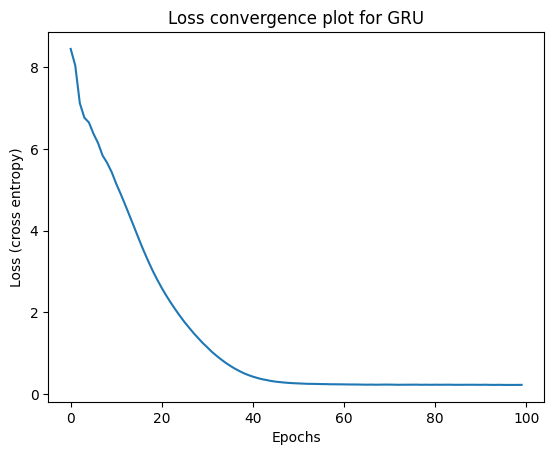

Geneated joke: fish walks into a bar and says ill have a burger for a week 


In [5]:

run_generation("GRU", nn.CrossEntropyLoss(), lr=0.01, model_configuration=2, batch_size_train="full", batch_size_test="full", epochs=100)

In [ ]:
# for some reason does not work in the jupyter notebooks, tested in the different environment
# run_generation("GRU", nn.CrossEntropyLoss(), lr=0.01, model_configuration=3, batch_size_train="full", batch_size_test="full", epochs=100)

Configuration 4: 5 layers, 100 hidden 100 embed

Epoch 1 ---------
Training loss: 8.45021915435791
Epoch 2 ---------
Training loss: 7.2895636558532715
Epoch 3 ---------
Training loss: 10.49258804321289
Epoch 4 ---------
Training loss: 9.534767150878906
Epoch 5 ---------
Training loss: 8.203259468078613
Epoch 6 ---------
Training loss: 7.859563827514648
Epoch 7 ---------
Training loss: 7.523941993713379
Epoch 8 ---------
Training loss: 7.241372108459473
Epoch 9 ---------
Training loss: 7.063261032104492
Epoch 10 ---------
Training loss: 7.0632734298706055
Epoch 11 ---------
Training loss: 6.9554877281188965
Epoch 12 ---------
Training loss: 6.761127948760986
Epoch 13 ---------
Training loss: 6.6921820640563965
Epoch 14 ---------
Training loss: 6.6651105880737305
Epoch 15 ---------
Training loss: 6.664306163787842
Epoch 16 ---------
Training loss: 6.556396007537842
Epoch 17 ---------
Training loss: 6.557771682739258
Epoch 18 ---------
Training loss: 6.493353366851807
Epoch 19 ---------
Training loss: 6.450301647186279
Epoch 20 --------

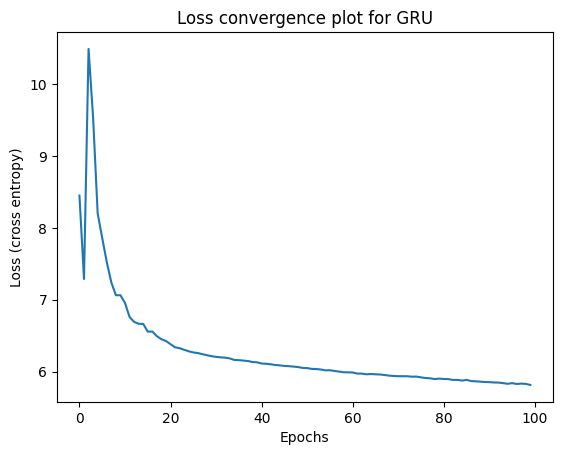

Geneated joke: fish walks into a bar and says ill have a burger for a week  


In [6]:

run_generation("GRU", nn.CrossEntropyLoss(), lr=0.1, model_configuration=4, batch_size_train="full", batch_size_test="full", epochs=100)

In [3]:

run_generation("GRU", nn.CrossEntropyLoss(), lr=0.01, model_configuration=5, batch_size_train="full", batch_size_test="full", epochs=100)

Epoch 1 ---------


: 

def run_generation


